In [31]:
!pip install transformers
!pip install tensorflow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from transformers import pipeline, AutoTokenizer, TFAutoModelForSequenceClassification
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#load data from csv
barbie_df = pd.read_csv('barbie_reviews.csv')
oppenheimer_df = pd.read_csv('oppenheimer_reviews.csv')

#drop all reviews which don't have any words or more than 300 words (model's word limit is ~333)
barbie_df = barbie_df[barbie_df['text'].str.split(',').apply(len) >= 3]
barbie_df = barbie_df[barbie_df['text'].str.split().apply(len) <= 300]
barbie_df.reset_index(drop=True, inplace=True)
oppenheimer_df = oppenheimer_df[oppenheimer_df['text'].str.split(',').apply(len) >= 3]
oppenheimer_df = oppenheimer_df[oppenheimer_df['text'].str.split().apply(len) <= 300]
oppenheimer_df.reset_index(drop=True, inplace=True)

#create the pipeline
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

#run sentiment analysis, add new feature to the dataframe with sentiment score.
#if model is not confident, label as neutral
sentiment_results = barbie_df['text'].apply(lambda x: sentiment_pipeline(x)[0])
barbie_df['sentiment'] = sentiment_results.apply(lambda x: 'neutral' if x['score'] < 0.7 else x['label'])

sentiment_results = oppenheimer_df['text'].apply(lambda x: sentiment_pipeline(x)[0])
oppenheimer_df['sentiment'] = sentiment_results.apply(lambda x: 'neutral' if x['score'] < 0.7 else x['label'])

#assign -1, 0, 1 to negative, neutral, and positive sentiments for clustering
barbie_df['sentiment_score'] = barbie_df['sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else (0 if x == 'NEUTRAL' else -1))
oppenheimer_df['sentiment_score'] = oppenheimer_df['sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else (0 if x == 'NEUTRAL' else -1))

#build kmeans model, add new feature to dfs with cluster numbers
num_clusters = 3

barbie_kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(barbie_df[['sentiment_score']])
barbie_df['cluster'] = barbie_df.labels_

oppenheimer_kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(oppenheimer_df[['sentiment_score']])
oppenheimer_df['cluster'] = oppenheimer_kmeans.labels_

#data vis on barbie
plt.figure(figsize=(8, 6))
barbie_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Barbie Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(barbie_df.index, np.random.rand(len(barbie_df)), c=barbie_df['cluster'])
plt.title('Clustering of Barbie Sentiments')
plt.xlabel('Review Index')
plt.ylabel('Random Noise')
plt.show()

#data vis on oppenheimer
plt.figure(figsize=(8, 6))
oppenheimer_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Oppenheimer Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(oppenheimer_df.index, np.random.rand(len(oppenheimer_df)), c=oppenheimer_df['cluster'])
plt.title('Clustering of Oppenheimer Sentiments')
plt.xlabel('Review Index')
plt.ylabel('Random Noise')
plt.show()

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
/Users/colby/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


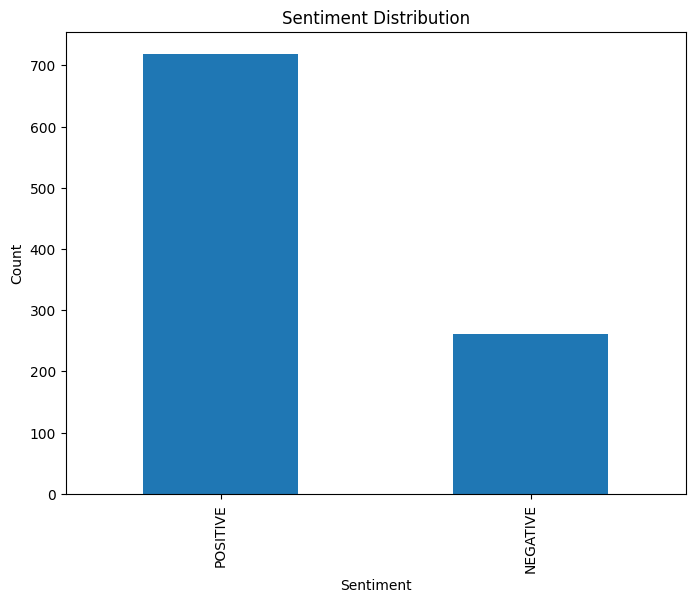

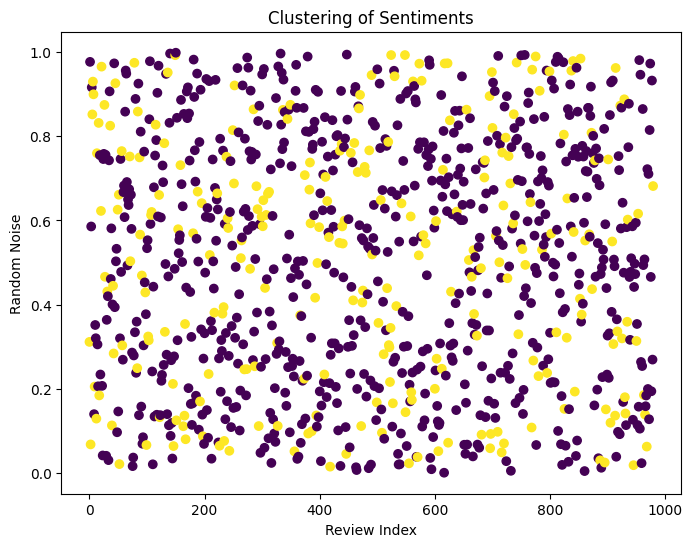

In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from transformers import pipeline, AutoTokenizer, TFAutoModelForSequenceClassification
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# load data from csv
barbie_reviews = pd.read_csv('barbie_reviews.csv')
oppenheimer_reviews = pd.read_csv('oppenheimer_reviews.csv')

# Combine datasets for analysis
reviews_df = pd.concat([barbie_reviews, oppenheimer_reviews], ignore_index=True)

#drop all reviews which don't have any words or more than 300 words (model's word limit is ~333)
reviews_df = reviews_df[reviews_df['text'].str.split(',').apply(len) >= 3]
reviews_df = reviews_df[reviews_df['text'].str.split().apply(len) <= 300]
reviews_df.reset_index(drop=True, inplace=True)

# Initialize the tokenizer and model from Transformers
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Apply sentiment analysis
reviews_df['sentiment'] = reviews_df['text'].apply(lambda x: sentiment_pipeline([x])[0]['label'])

# Convert sentiment to numerical for clustering
reviews_df['sentiment_score'] = reviews_df['sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

# K-Means clustering based on sentiment scores
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(reviews_df[['sentiment_score']])
reviews_df['cluster'] = kmeans.labels_

# Visualization
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
reviews_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot clustering results
plt.figure(figsize=(8, 6))
plt.scatter(reviews_df.index, np.random.rand(len(reviews_df)), c=reviews_df['cluster'])
plt.title('Clustering of Sentiments')
plt.xlabel('Review Index')
plt.ylabel('Random Noise')
plt.show()


In [29]:
sentiment_pipeline('I love this product')[0]['label']

'POSITIVE'

In [57]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

classification = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
classification('''I guess the movie was just fine. it could have been better''')


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'POSITIVE', 'score': 0.9979857206344604}]

In [49]:
count = 0
for index, row in reviews_df.iterrows():
    if(len(row['text'].split()) > 300):
        count += 1

print(count)

15


In [38]:
for index, row in reviews_df.iterrows():
    print(row['text'])
    print(sentiment_pipeline(row['text'])[0]['label'])

Margot does the best with what she's given, but this film was very disappointing to me. It was marketed as a fun, quirky satire with homages to other movies. It started that way, but ended with over-dramatized speeches and an ending that clearly tried to make the audience feel something, but left everyone just feeling confused. And before you say I'm a crotchety old man, I'm a woman in my 20s, so I'm pretty sure I'm this movie's target audience. The saddest part is there were parents with their kids in the theater that were victims of the poor marketing, because this is not a kid's movie. Overall, the humor was fun on occasion and the film is beautiful to look at, but the whole concept falls apart in the second half of the film and becomes a pity party for the "strong" woman.
NEGATIVE
As much as it pains me to give a movie called "Barbie" a 10 out of 10, I have to do so. It is so brilliantly handled and finely crafted, I have to give the filmakers credit. Yes, I am somewhat conservativ

InvalidArgumentError: Exception encountered when calling layer 'embeddings' (type TFEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 512 is not in [0, 512) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 702), dtype=int32)
  • position_ids=None
  • inputs_embeds=None
  • training=False